### Data Cleaning

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import datetime
print('Setup complete!')

Setup complete!


In [366]:
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [367]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [368]:
data['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [369]:
data['bpay_biller_code'].value_counts()

0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64

In [370]:
data['merchant_code'].value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [371]:
data['merchant_suburb'].value_counts()

Melbourne           255
Sydney              233
Southport            82
Brisbane City        79
Chatswood            55
                   ... 
Weston                1
West Lakes Shore      1
Middleton Beach       1
Curl Curl             1
Camperdown            1
Name: merchant_suburb, Length: 1609, dtype: int64

In [372]:
data['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

### Some of the columns are irrelevant to the data and would be removed, the others would be dealth woth accordingly

In [373]:
cols_to_be_dropped = ['bpay_biller_code','merchant_code']
data = data.drop(columns=cols_to_be_dropped)

In [374]:
cols_drop_missing_vals = ['merchant_state','merchant_suburb','card_present_flag','merchant_long_lat','merchant_id']
data = data.dropna(subset = cols_drop_missing_vals)
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [375]:
data.isnull().sum()

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

### All missing values have been dealth with

In [376]:
data.head(3)

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


### check the datatypes 

In [377]:
data.dtypes

status                       object
card_present_flag           float64
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [378]:
cols_with_bad_dtypes = ['extraction','merchant_long_lat','long_lat']

In [379]:
data['extraction'].value_counts()

2018-09-20T08:33:39.000+0000    1
2018-08-18T11:27:42.000+0000    1
2018-09-15T21:59:59.000+0000    1
2018-08-07T17:07:41.000+0000    1
2018-08-01T19:23:57.000+0000    1
                               ..
2018-08-15T17:00:12.000+0000    1
2018-08-19T14:21:00.000+0000    1
2018-08-04T14:07:23.000+0000    1
2018-09-13T09:42:47.000+0000    1
2018-09-26T11:57:35.000+0000    1
Name: extraction, Length: 7717, dtype: int64

In [380]:
data['extraction']=pd.to_datetime(data['extraction'])

In [381]:
data['merchant_long_lat']=data['merchant_long_lat'].str.extract(r'(\d+.\d+)').astype('float')
data['long_lat']=data['long_lat'].str.extract(r'(\d+.\d+)').astype('float')

In [382]:
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44,debit


### All the data types are in the correct format

In [383]:
data.duplicated().any()

False

In [384]:
print('The number of rows and columns respectively in the data is:',data.shape)

The number of rows and columns respectively in the data is: (7717, 21)


In [385]:
data.describe()

,card_present_flag,long_lat,balance,age,amount,merchant_long_lat
count,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000
mean,0.802644,143.779001,11871.056585,30.052093,40.153732,143.433277
std,0.398029,16.901687,25999.398243,9.439454,149.833070,12.090074
min,0.000000,114.620000,0.240000,18.000000,0.100000,113.830000
25%,1.000000,138.670000,2723.890000,23.000000,12.080000,144.680000
50%,1.000000,145.730000,5286.040000,27.000000,19.700000,145.830000
75%,1.000000,151.230000,10278.290000,38.000000,33.910000,151.210000
max,1.000000,255.000000,267093.660000,78.000000,7081.090000,153.610000


### Exploratory data analysis

In [386]:
data.head(2)

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21,debit


In [387]:
data['amount'].mean()

40.15373202021511

In [388]:
#extract the month from the date
data['month']=data.date.dt.month

In [389]:
data['month'].value_counts()

9     2601
10    2581
8     2535
Name: month, dtype: int64

#### customers make more transactions in september with around 2601 transactions and the make the least transactions in ausgust with 2535

gender
F    39.085293
M    41.224112
Name: amount, dtype: float64


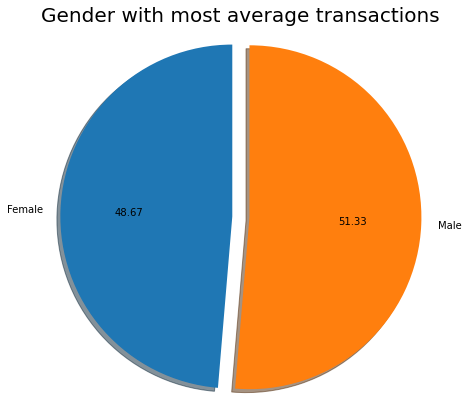

In [390]:
print(data.groupby('gender')['amount'].mean());

fig1, ax1 = plt.subplots(figsize=(7,7))
labels=['Female','Male']
explode=(0,0.1)
plt.pie(data.groupby('gender')['amount'].mean(),labels=labels, explode=explode,shadow=True,
        startangle=90,autopct='%.2f')
ax1.axis('equal');
ax1.set_title('Gender with most average transactions',fontdict={'size':20});

#### males make the most transactions on average making over 51% of the transactions

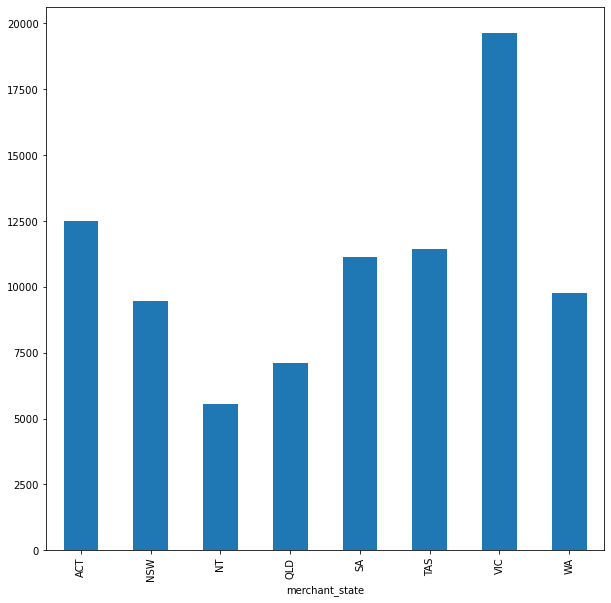

In [391]:
data.groupby('merchant_state')['balance'].mean().plot(kind='bar', figsize=(10,10))

#### state of victoria has the highest average balance among all states with northern territory having the least

In [392]:
data.head(2)

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month
0,authorized,1.0,ACC-1598451071,AUD,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38,debit,8
1,authorized,0.0,ACC-1598451071,AUD,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21,debit,8


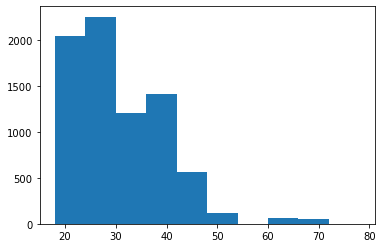

In [393]:
ax=plt.hist(data['age']);

In [394]:
data['age'].mean()

30.052092782169236

### there is a right skewness in the age data, showing most people are between the ages of 20 and 30

In [395]:
data['date'].value_counts()[:10]

2018-09-29    111
2018-09-01    110
2018-09-28    108
2018-10-05    106
2018-09-21    105
2018-08-17    105
2018-10-20    105
2018-09-22    105
2018-08-18    104
2018-10-14    104
Name: date, dtype: int64

In [396]:
data.groupby('date')['amount'].mean()[:10]

date
2018-08-01    40.707619
2018-08-02    50.728182
2018-08-03    50.978788
2018-08-04    46.043085
2018-08-05    37.910959
2018-08-06    23.383396
2018-08-07    87.932273
2018-08-08    36.178000
2018-08-09    36.717045
2018-08-10    24.130505
Name: amount, dtype: float64

In [397]:
data.groupby('date')['amount'].mean()

date
2018-08-01    40.707619
2018-08-02    50.728182
2018-08-03    50.978788
2018-08-04    46.043085
2018-08-05    37.910959
                ...    
2018-10-27    23.342376
2018-10-28    33.565446
2018-10-29    24.780635
2018-10-30    24.286400
2018-10-31    40.453226
Name: amount, Length: 91, dtype: float64

In [398]:
data.groupby('date')['amount'].mean().sort_values()[:10]

date
2018-10-27    23.342376
2018-08-06    23.383396
2018-10-03    23.450412
2018-09-24    23.556545
2018-08-10    24.130505
2018-10-30    24.286400
2018-10-29    24.780635
2018-08-24    25.118725
2018-10-05    25.666509
2018-08-26    25.726071
Name: amount, dtype: float64

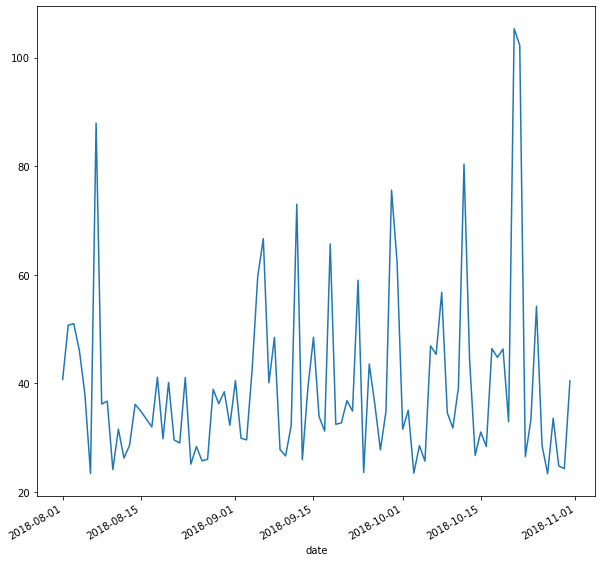

In [399]:
data.groupby('date')['amount'].mean().plot(kind='line', figsize=(10,10))

#### most transactions happened in the month of october, with the most transactions occuring around the 21st and 22nd october,
#### The least transactions occured on 27th october and 6th august

### analyze the transactions for the month of august

In [400]:
august=data[data['month']==8]

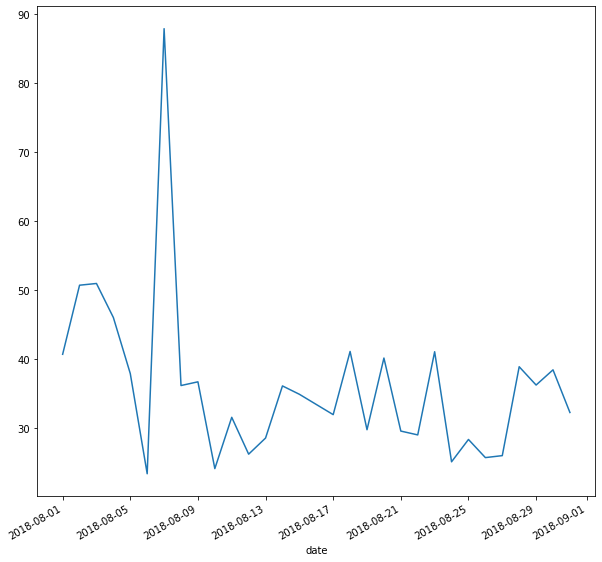

In [401]:
august.groupby('date')['amount'].mean().plot(kind='line', figsize=(10,10))

#### most transactions occurred between 5th august and 9th august with almost 90 transactions. Transactions didnt improve over time and there seems to be no trend to the transactions over time

In [402]:
data['day']=data.date.dt.day

In [403]:
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
0,authorized,1.0,ACC-1598451071,AUD,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38,debit,8,1
1,authorized,0.0,ACC-1598451071,AUD,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21,debit,8,1
2,authorized,1.0,ACC-1222300524,AUD,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21,debit,8,1
3,authorized,1.0,ACC-1037050564,AUD,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05,debit,8,1
4,authorized,1.0,ACC-1598451071,AUD,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44,debit,8,1


In [404]:
first_day_august=data[data['date']=='2018-08-01']
first_day_august.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
0,authorized,1.0,ACC-1598451071,AUD,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38,debit,8,1
1,authorized,0.0,ACC-1598451071,AUD,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21,debit,8,1
2,authorized,1.0,ACC-1222300524,AUD,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21,debit,8,1
3,authorized,1.0,ACC-1037050564,AUD,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05,debit,8,1
4,authorized,1.0,ACC-1598451071,AUD,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44,debit,8,1


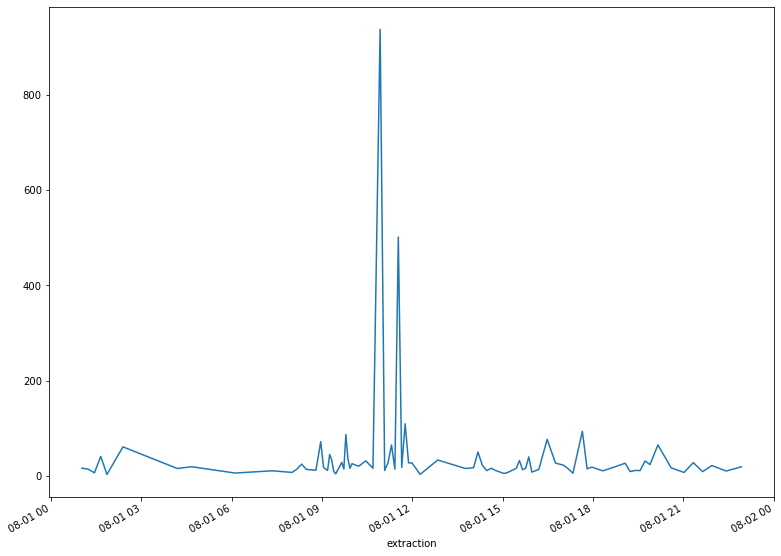

In [405]:
first_day_august.groupby('extraction')['amount'].mean().plot(kind='line', figsize=(13,10))

#### first day of august, the time of most transactions is around midday, with over 800 transactions. The rest of the hours of the day record less than 50 transactions per that hour

In [406]:
first_week_september=data[data['date'].between('2018-09-01', '2018-09-08', inclusive=False)]
first_week_september.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
4080,authorized,0.0,ACC-3100725361,AUD,145.73,SALES-POS,e475c328-f4bb-4542-b036-e7ee08661afc,Ronald,126.80,2018-09-02,M,25,Elliott,TAS,2018-09-02 00:34:59+00:00,24.54,a65173159e1440a18f75fa3c0998ce02,Australia,CUS-2178051368,145.79,debit,9,2
4081,authorized,1.0,ACC-854938045,AUD,147.63,POS,b2bfeb0c-0b50-493e-a1e4-bd6c571b22a6,James,9541.21,2018-09-02,M,28,Melbourne,VIC,2018-09-02 01:13:38+00:00,44.36,b3709b324c964a43813e313a21a4a084,Australia,CUS-4023861240,144.97,debit,9,2
4082,authorized,1.0,ACC-1903037542,AUD,153.05,POS,9bd98735-8b39-4eb1-9226-4624430f74a1,Jeffrey,3192.08,2018-09-02,M,30,Rangeville,QLD,2018-09-02 01:36:21+00:00,25.60,9e5e8a77dd1b48748b8a84efdd69d28c,Australia,CUS-860700529,151.98,debit,9,2
4083,authorized,1.0,ACC-3100725361,AUD,145.73,SALES-POS,a42d4595-dcd9-41ca-95e4-946b8243355b,Ronald,111.02,2018-09-02,M,25,Berrigan,NSW,2018-09-02 01:59:05+00:00,15.78,eb5f86aa95044496821449eb0507010d,Australia,CUS-2178051368,145.81,debit,9,2
4085,authorized,1.0,ACC-37709441,AUD,153.41,SALES-POS,92b064b0-5bc8-48f9-9294-7145b058d4e6,Charles,6711.84,2018-09-02,M,18,Pimpama,QLD,2018-09-02 02:31:59+00:00,7.71,d75e274f265349df99c1ce268e7b129e,Australia,CUS-3336454548,153.32,debit,9,2


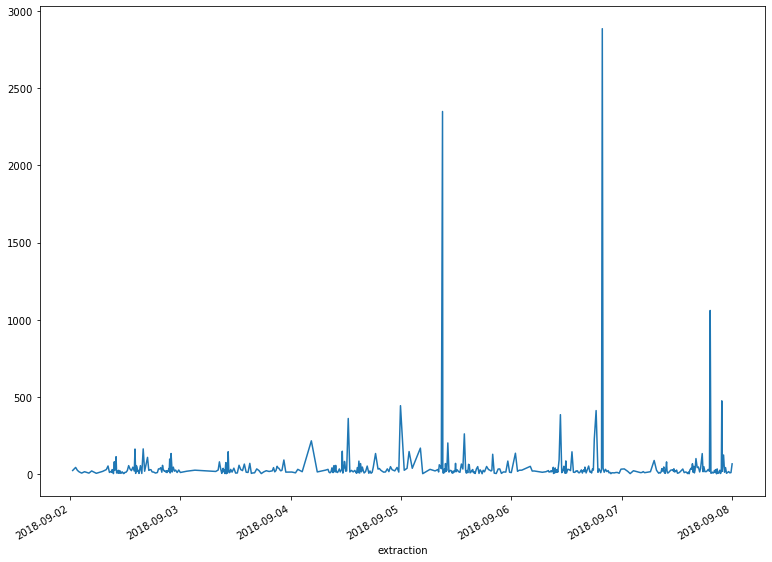

In [407]:
first_week_september.groupby('extraction')['amount'].mean().plot(kind='line', figsize=(13,10))

#### In the first week of september, the highest amount of transactions occurred on the 7th of september, which was a friday

In [408]:
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
0,authorized,1.0,ACC-1598451071,AUD,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38,debit,8,1
1,authorized,0.0,ACC-1598451071,AUD,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21,debit,8,1
2,authorized,1.0,ACC-1222300524,AUD,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21,debit,8,1
3,authorized,1.0,ACC-1037050564,AUD,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05,debit,8,1
4,authorized,1.0,ACC-1598451071,AUD,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44,debit,8,1


In [409]:
data['day_of_week']=data['date'].dt.day_name()

In [410]:
data['day_of_week'].value_counts()

Saturday     1337
Friday       1317
Wednesday    1251
Sunday       1126
Thursday     1103
Tuesday       841
Monday        742
Name: day_of_week, dtype: int64

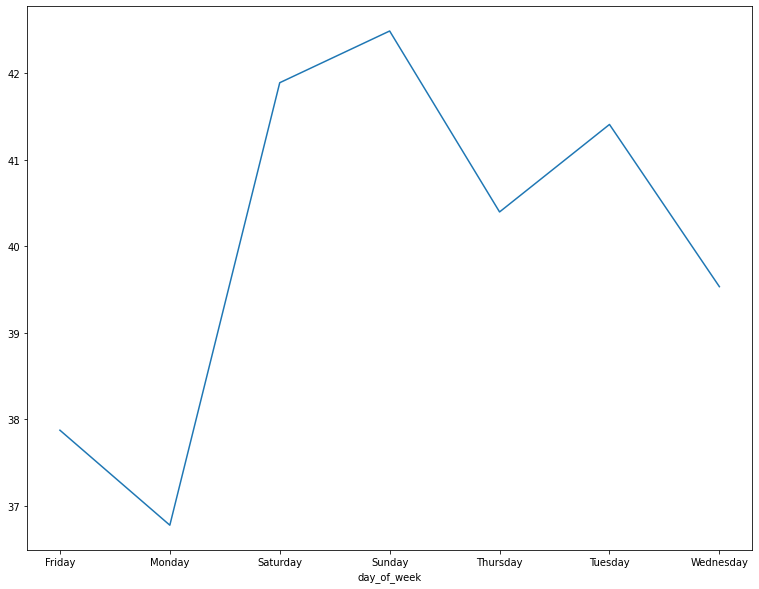

In [416]:
data.groupby('day_of_week')['amount'].mean().plot(kind='line', figsize=(13,10))

In [418]:
data.to_csv('new_data.csv')